In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [3]:
file_path = r"C:\Users\anand\Downloads\wine+quality\winequality-red.csv"
red_wine = pd.read_csv(file_path, sep=";")
print(red_wine.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
print(red_wine.info())
print(red_wine.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

In [ ]:
X = red_wine.drop(columns=["quality"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance (PC1, PC2): {explained_variance}")


Explained Variance (PC1, PC2): [0.28173931 0.1750827 ]


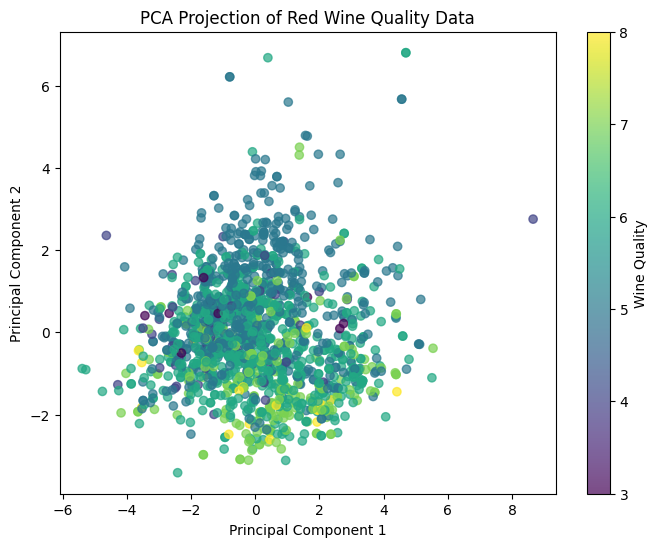

In [7]:

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=red_wine["quality"], cmap='viridis', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Wine Quality")
plt.title("PCA Projection of Red Wine Quality Data")
plt.show()


PC1 explained 28.17% of the variance and PC2 explained 17.51%, meaning together, they retained 45.67% of the total variance. This means 54.33% of the original information was lost when reducing from 11 features to 2. While this makes the dataset easier to visualize and process, it also means that some important details may be missing. If we wanted higher accuracy, we could use more principal components to retain more variance.

In [8]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\anand\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

In [9]:
print(X_tsne[:5])


[[-41.600174   17.456373 ]
 [-22.86949    33.12632  ]
 [-22.704964   31.576172 ]
 [ 35.321644    1.5396777]
 [-41.496197   17.767351 ]]


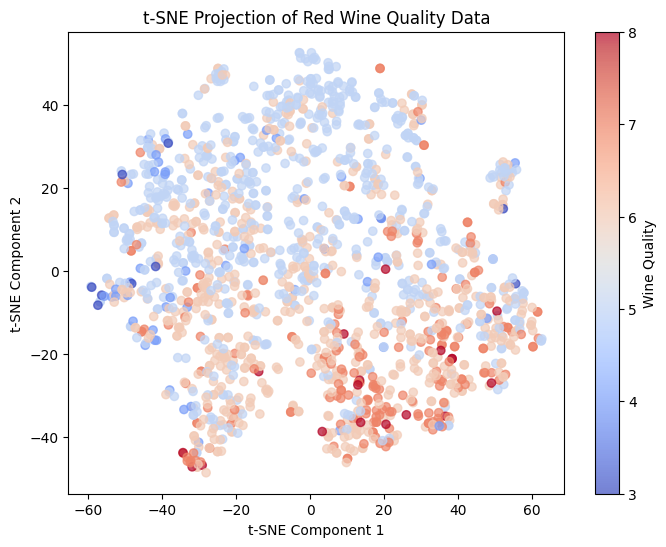

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=red_wine["quality"], cmap='coolwarm', alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Wine Quality")
plt.title("t-SNE Projection of Red Wine Quality Data")
plt.show()


3.2
PCA reduces dimensionality while keeping the global structure intact, making it easy to interpret. However, in our dataset, PCA did not clearly separate wine quality groups as most points overlapped. t-SNE, on the other hand, focused on local structures and formed distinct clusters, making it better for visualizing hidden patterns. While t-SNE produced clearer groups, it is harder to interpret and takes more computation time than PCA.

3.3
PCA uses a linear transformation to find new axes that capture maximum variance, preserving global relationships in the data. However, it does not detect nonlinear patterns well. t-SNE, on the other hand, is a nonlinear technique that preserves local similarities, grouping similar data points closer together. This makes t-SNE better for clustering, but it does not retain global distances, and its results are not easy to interpret.

 PCA is better for structured dimensionality reduction and interpretability, while t-SNE is superior for clustering and revealing hidden relationships.